Proiektu hau atal asko ditu.Isign-en ereduaren zenbait gauza aztertzen ditu.

1) Ising-en ereduko energia, magnetizazioa, entropia eta $c_v$ lortu.

2) Ising-en ereduan ondokoen kopurua handitu.

3) Ising eredua ondo irudikaru vpython erabiliz eta interakzioa ahalbidetu.

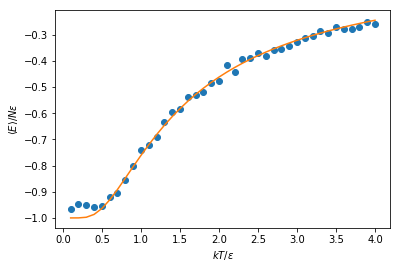

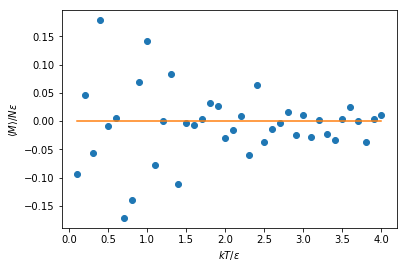

In [3]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

def hasiera(N):                                              #Gure spinen katea egiten dugu
    p,spin,E,M=0.5,[1]*N,0.,0.
    for i in range(1,N):
        if (rnd.random()<p):
            spin[i]=-1
        E=E-spin[i-1]*spin[i]
        M=M+spin[i]
    return spin,E-spin[N-1]*spin[0],M+spin[0]

def metropolis(N, spin,kT,E,M):                 #Metropolis algoritmoa
    i, flip=rnd.randint(0,N-1),0
    dE=2*spin[i]*(spin[i-1]+spin[(i+1)%N])      #24. ekuazioa muga baldintza periodikoak hartuz
    if (dE<0.0):
        flip=1                                  #biraketa onartu
    else:
        p=np.exp(-dE/kT)
        if (rnd.random()<p):
            flip=1
    if (flip==1):
        E=E+dE                                   #Energia berria biraketa onartu era gero
        M=M-2*spin[i]                            #Magnetizazio berria
        spin[i]=-spin[i]
    return E,M

N,pausuak=1000,10
iterak,Nmc=N*pausuak*10,N*pausuak
T,Ebat,Mbat,z=[],[],[],[]
for i in range(1,41):
    kT=0.1*i
    spin,E,M=hasiera(N)
    for k in range(iterak):                                  #Oreka lortzen dugu tenperatura bakoitzeko
        E,M=metropolis(N,spin,kT,E,M)
    E1,M1=0.,0.
    for j in range(Nmc):
        E,M=metropolis(N,spin,kT,E,M)
        E1,M1=E1+E,M1+M
    E1,M1=E1/Nmc,M1/Nmc                                      #Batezbesteko kalkulatzen dugu
    T.append(kT),Ebat.append(E1/N),Mbat.append(M1/N)
    z.append(0.0)
    
plt.figure()
plt.plot(T,Ebat,'o',T,-np.tanh(1./np.array(T)))
plt.xlabel('$kT/\epsilon$')
plt.ylabel(r'$\langle E \rangle /N\epsilon$')
plt.figure()
plt.plot(T,Mbat,'o',T,z)
plt.xlabel('$kT/\epsilon$')
plt.ylabel(r'$\langle M \rangle /N\epsilon$')
plt.show()

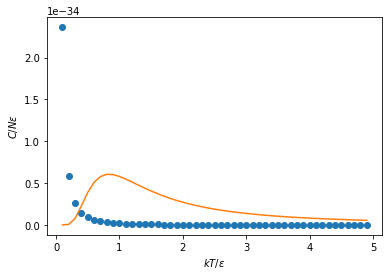

In [2]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

def hasiera(N):                                              #Gure spinen katea egiten dugu
    p,spin,E,M=0.5,[1]*N,0.,0.
    for i in range(1,N):
        if (rnd.random()<p):
            spin[i]=-1
        E=E-spin[i-1]*spin[i]
        M=M+spin[i]
    return spin,E-spin[N-1]*spin[0],M+spin[0]

N,pausuak=1000,10
iterak,Nmc=N*pausuak,N*pausuak
T,C,Cteo=[],[],[]
k=1.38e-34
for i in range(1,50):
    kT=0.1*i
    spin,E,M=hasiera(N)
    for l in range(iterak):                                  #Oreka lortzen dugu tenperatura bakoitzeko
        E,M=metropolis(N,spin,kT,E,M)
    
    E1=0.0
    E2=0.0
    for j in range(200):
        E,M=metropolis(N,spin,kT,E,M)
        E1=E1+E
        E2=(E2**2+(E**2)/(Nmc)**2)
        #print(E1)
        #print(E2)
    E1=E1/Nmc
    T.append(kT),C.append((k*(E2-E1)/(kT)**2)/N),Cteo.append(k/(kT*np.cosh(1/kT))**2)

plt.figure()
plt.plot(T,C,'o',T,Cteo)
plt.xlabel('$kT/\epsilon$')
plt.ylabel(r'$C /N\epsilon$')  
plt.show()

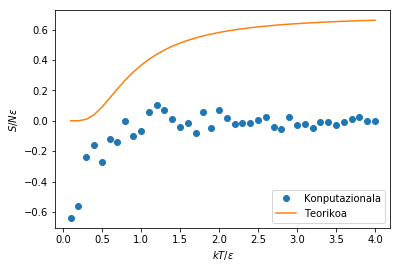

In [12]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

def hasiera(N):                                              #Gure spinen katea egiten dugu
    p,spin,E,M=0.5,[1]*N,0.,0.
    for i in range(1,N):
        if (rnd.random()<p):
            spin[i]=-1
        E=E-spin[i-1]*spin[i]
        M=M+spin[i]
    return spin,E-spin[N-1]*spin[0],M+spin[0]

N,pausuak=1000,10
iterak,Nmc=N*pausuak,N*pausuak
T,S,Steo=[],[],[]
k=1.38e-23
S1=0.0
kT1=0.0
fig=plt.figure()
for i in range(1,41):
    kT=0.1*i
    spin,E,M=hasiera(N)
    for l in range(iterak):                                  #Oreka lortzen dugu tenperatura bakoitzeko
        E,M=metropolis(N,spin,kT,E,M)
    
    E=0.0
    E1=0.0
    E2=E1
    for j in range(Nmc):
        E,M=metropolis(N,spin,kT,E,M)
        E1=E
    T.append(kT),S.append(S1/N+2*(E1-E2)/(N*(kT+kT1))),Steo.append([np.log(2.*np.cosh(1./kT))-np.tanh(1./kT)/kT])
    S1=S1+2*(E1-E2)/(N*(kT+kT1))
    KT1=kT

plt.plot(T,S,'o',label='Konputazionala')
plt.plot(T,Steo,label='Teorikoa')
ax=fig.add_subplot(111)
ax.legend(loc='lower right')
plt.xlabel('$kT/\epsilon$')
plt.ylabel(r'$S /N\epsilon$') 
plt.show()

Lehenengo atal honen arazoak:
- ez dut lortu $c_v$ 
- Entropia ez dago guztiz ondo baina bai nahiko ondo eta itxura ondo dago

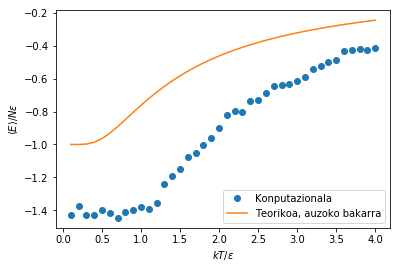

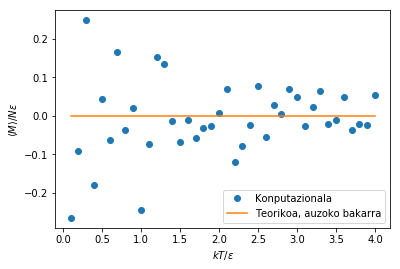

In [14]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

def hasiera(N):                                              #Gure spinen katea egiten dugu
    p,spin,E,M=0.5,[1]*N,0.,0.
    for i in range(1,N):
        if (rnd.random()<p):
            spin[i]=-1
        E=E-spin[i-1]*spin[i]
        M=M+spin[i]
    return spin,E-spin[N-1]*spin[0],M+spin[0]

def metropolis2(N, spin,kT,E,M):                 #Metropolis algoritmoa p11.4b) moduan eginda
    i, flip=rnd.randint(0,N-1),0
    r=0.5
    dE=2*spin[i]*(r*spin[i-2]+spin[i-1]+spin[(i+1)%N]+r*spin[(i+2)%N])      #24. ekuazioa muga baldintza periodikoak hartuz
    if (dE<0.0):
        flip=1                                  #biraketa onartu
    else:
        p=np.exp(-dE/kT)
        if (rnd.random()<p):
            flip=1
    if (flip==1):
        E=E+dE                                   #Energia berria biraketa onartu era gero
        M=M-2*spin[i]                            #Magnetizazio berria
        spin[i]=-spin[i]
    return E,M

N,pausuak=1000,10
iterak,Nmc=N*pausuak*10,N*pausuak
T,Ebat,Mbat,z=[],[],[],[]
for i in range(1,41):
    kT=0.1*i
    spin,E,M=hasiera(N)
    for k in range(iterak):                                  #Oreka lortzen dugu tenperatura bakoitzeko
        E,M=metropolis2(N,spin,kT,E,M)
    E1,M1=0.,0.
    for j in range(Nmc):
        E,M=metropolis2(N,spin,kT,E,M)
        E1,M1=E1+E,M1+M
    E1,M1=E1/Nmc,M1/Nmc                                      #Batezbesteko kalkulatzen dugu
    T.append(kT),Ebat.append(E1/N),Mbat.append(M1/N)
    z.append(0.0)
    
fig=plt.figure()
plt.plot(T,Ebat,'o',label='Konputazionala')
plt.plot(T,-np.tanh(1./np.array(T)),label='Teorikoa, auzoko bakarra')
ax=fig.add_subplot(111)
ax.legend(loc='lower right')
plt.xlabel('$kT/\epsilon$')
plt.ylabel(r'$\langle E \rangle /N\epsilon$')
fig2=plt.figure()
plt.plot(T,Mbat,'o',label='Konputazionala')
plt.plot(T,z,label='Teorikoa, auzoko bakarra')
ax2=fig2.add_subplot(111)
ax2.legend(loc='lower right')
plt.xlabel('$kT/\epsilon$')
plt.ylabel(r'$\langle M \rangle /N\epsilon$')
plt.show()

Bigarren atal hau guztiz ondo dago, bakarrik geratzen da azaltzea energiaren aldaketa.

In [ ]:
import random as rnd
import ivisual as vp
import numpy as np
import ipywidgets as widgets

def hasiera(N):                                              #Gure spinen katea egiten dugu
    p,spin,E,M=0.5,[1]*N,0.,0.
    for i in range(1,N):
        if (rnd.random()<p):
            spin[i]=-1
        E=E-spin[i-1]*spin[i]
        M=M+spin[i]
    return spin,E-spin[N-1]*spin[0],M+spin[0]

def metropolis(N, spin,kT):                 #Metropolis algoritmoa E,M kenduta dena errazteko
    i, flip=rnd.randint(0,N-1),0
    dE=2*spin[i]*(spin[i-1]+spin[(i+1)%N])      #24. ekuazioa muga baldintza periodikoak hartuz
    if (dE<0.0):
        flip=1                                  #biraketa onartu
    else:
        p=np.exp(-dE/kT)
        if (rnd.random()<p):
            flip=1
    if (flip==1):
        spin[i]=-spin[i]
    return spin
N=50
spin,E,M=hasiera(N)
L=1.0
scene=vp.display(title='1D ising',background=(.2,.5,1),center=(0,0,1.0),forward=(-.4,-.3,-1))
ay=(0,1,0)
x=np.linspace(-5*L,5*L,N)
s=np.arange(N)                                                            #número de spines
spind=[]                                                                  #spin_dibujo:la imagen de nuestros spines
for i in s:
    spind.append(vp.arrow(pos=(x[i],0,0),axis=(0,spin[i],0),length=1.0,color=(1,1,1)))
vp.label(pos=(0,2.,0),text='kT=15.5',box=True)

while True:
    vp.rate(100)
    kT=15.5
    spin=metropolis(N,spin,kT)
    for i in s:
        spind[i].axis=(0,spin[i],0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

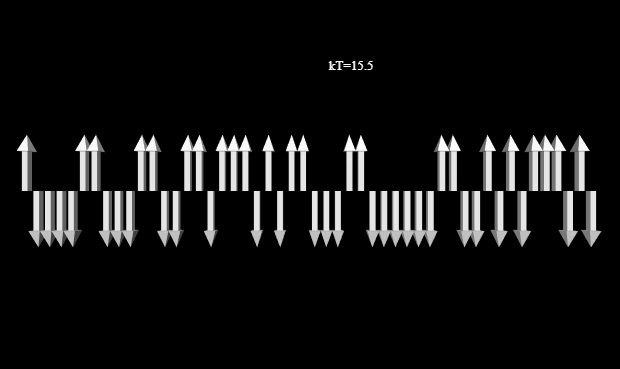
$$1D-ko ising eredua kT=15.5$$

Hirugarren atal hau nahiko ondo dago, ditudan arazoak:
- Ez dut lortzen era iteraktiboan egin.
- Ez dut lortu bi dimentsioko kasuan videoa egin, agian egin dezakedana da jarri bi dimentsioko kasu hau Leire duen paper modu berean eta gero egin bqplot adibidean agertzen den egitura(https://bqplot.readthedocs.io/en/stable/introduction.html).
- Ez dut lortu adibide honetan label guztiak ondo jarri.